In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Original:
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    7. ]
 [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
    3. ]
 [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
    3. ]]

Scaled:
[[ 0.94872647  0.68620244 -2.25177456  0.75752504 -0.2649003   2.394438
   1.01668424  0.01719733 -0.69663055  1.08733806  2.27457861 -0.71113139
   0.66000414]
 [ 1.39200191  0.68620244  0.87798549  1.61121989  0.76041519 -0.41763453
   1.01668424 -1.82190531  1.43548113  0.39718162  0.64911323  2.5048807
  -0.89023814]
 [ 1.39200191  0.68620244  0.87798549 -0.6652997  -0.34228261 -0.41763453
   1.01668424 -0.90235399  1.43548113  1.34614673  0.64911323  1.43287667
   1.17675157]
 [-1.93256387  0.68620244 -0.16526786 -0.0961698   0.06397448 -0.41763453
  -0.99674

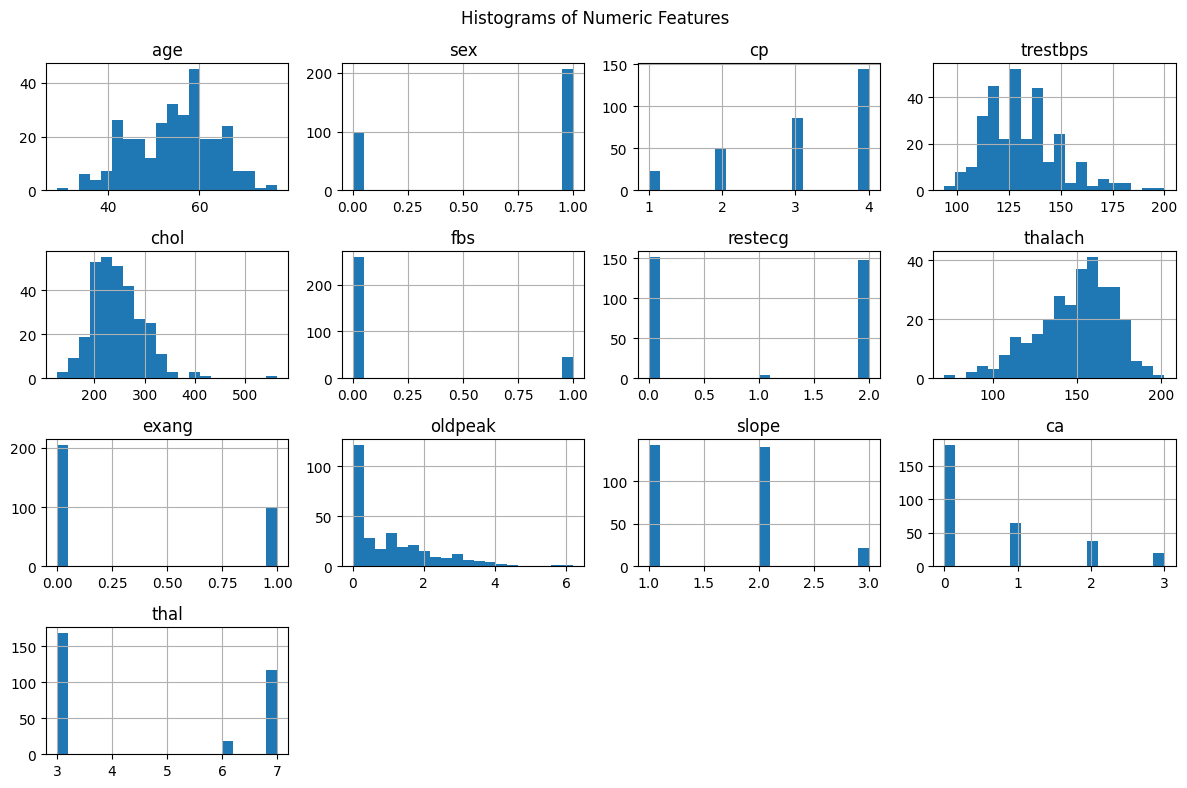

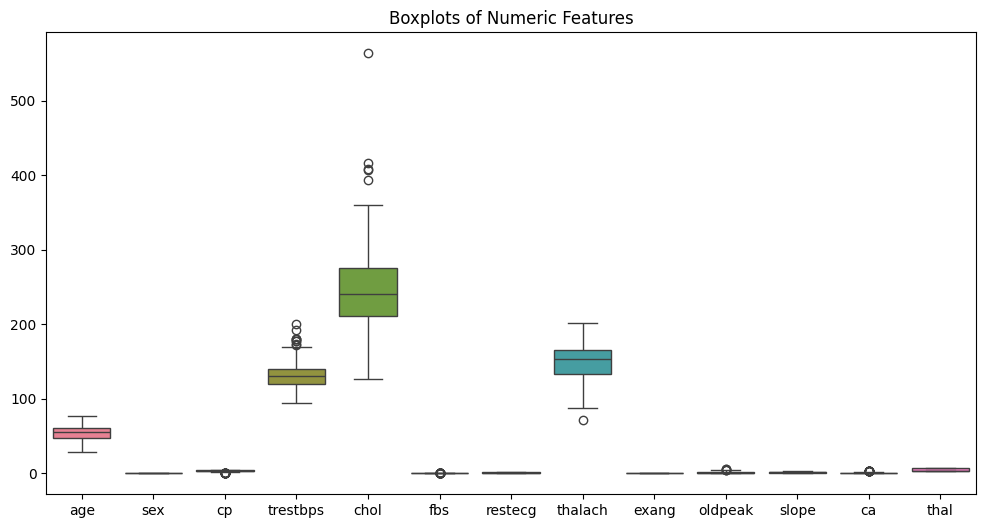

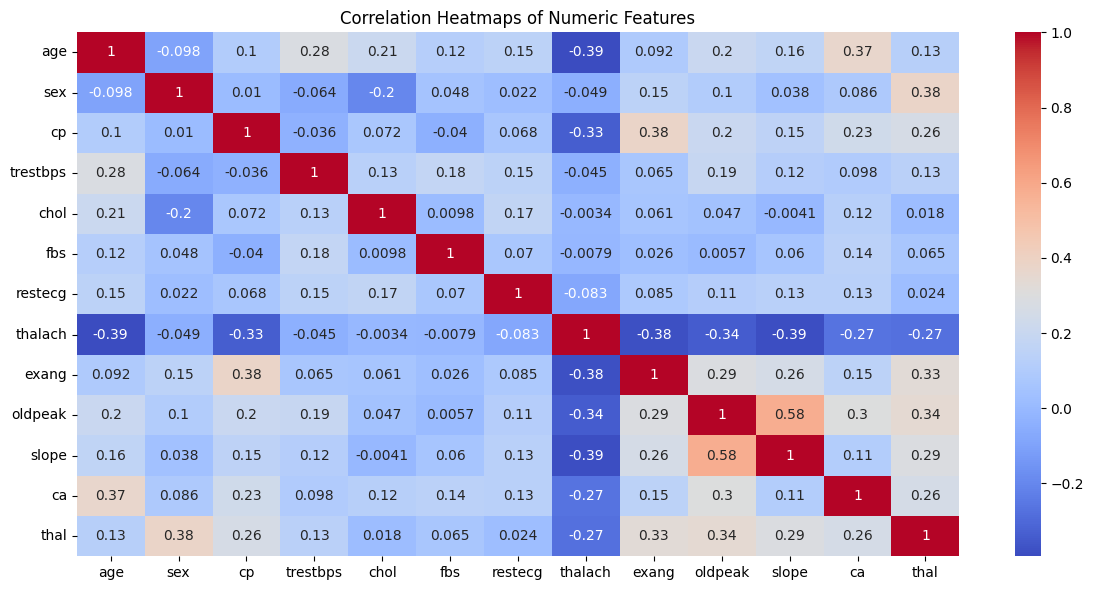

In [ ]:
###Data Preprocessing & Cleaning###

# Always work from the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(project_root)

# Make sure data folder exists
os.makedirs('data', exist_ok=True)

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

'''# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) '''

# Handle missing values
# Make X a full copy to avoid warnings
X = X.copy()

# Separate numeric and categorigal columns 
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Fill numeric columns with median
for col in numeric_cols:
    X[col]= X[col].fillna(X[col].median())

# Fill categorigal columns with mode
for col in categorical_cols:
    X[col]= X[col].fillna(X[col].mode()[0])

# For the target 
y= y.fillna(y.mode().iloc[0]).values.ravel()

# Checking the dataset after handeling the missing valuse
#print(X.isnull().sum)

# Perform data encoding
X_encoded = pd.get_dummies(X)
#print(X_encoded.head)

# Standardize numerical features
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X_encoded)

print(f"Original:\n{X[:5].values}")
print(f"\nScaled:\n{X_scaled[:5]}")

# Conduct Exploratory Data Analysis (EDA)

# Histograms for numeric features

if len(numeric_cols)>0:
    X[numeric_cols].hist(bins=20, figsize=(12,8))
    plt.suptitle("Histograms of Numeric Features")
    plt.tight_layout()
    plt.show()

# Boxplots for numeric features

if len(numeric_cols)>0:
    plt.figure(figsize=(12,6))
    sns.boxplot(data= X[numeric_cols])
    plt.title("Boxplots of Numeric Features")
    plt.show()

# Correlation heatmaps for numeric features

if len(numeric_cols)>1: #corr requires @least 2 numeric cols
    plt.figure(figsize=(12,6))
    sns.heatmap(X[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmaps of Numeric Features")
    plt.tight_layout()
    plt.show()


# Save cleaned dataset locally

pd.DataFrame(X_encoded).to_csv('data/heart_disease_clean.csv', index=False)

